In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Função principal, onde serão definidos os passos a seguir

Pega o conjunto de dados e analisa

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
RMSE: 2946.634, interacao: 0
RMSE: 2619.309, interacao: 0
RMSE: 2329.684, interacao: 1
RMSE: 2073.419, interacao: 2
RMSE: 1846.670, interacao: 3
RMSE: 1646.039, interacao: 4
RMSE: 1468.516, interacao: 5
RMSE: 1311.440, interacao: 6
RMSE: 1172.457, interacao: 7
RMSE: 1049.481, interacao: 8
RMSE: 940.670, interacao: 9
[[2.94663450e+03 0.00000000e+00]
 [2.61930856e+03 1.00000000e+00]
 [2.32968420e+03 2.00000000e+00]
 [2.07341892e+03 3.00000000e+00]
 [1.84667038e+03 4.00000000e+00]
 [1.64603881e+03 5.00000000e+00]
 [1.46851602e+03 6.00000000e+00]
 [1.31144033e+03 7.00000000e+00]
 [1.17245661e+03 8.00000000e+00]
 [1.04948101e+03 9.00000000e+00]
 [9.40669694e+02 1.00000000e+01]]


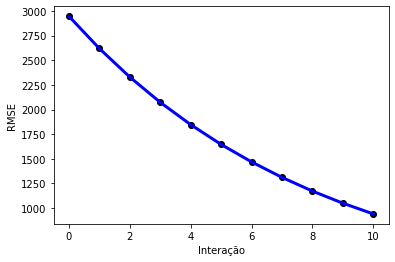

After 10 iterations b = 0.08411823075092255, m = 1.482994135248462, error = 940.6696938189039
RMSE:  940.6696938189039


In [14]:


import numpy as np
import matplotlib.pyplot as plt

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2    
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    RMSE = compute_error_for_line_given_points(b, m, points)
    array_rmse = np.array([[RMSE, 0]])
    print("RMSE: {:.3f}, interacao: {}".format(RMSE, 0))
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        RMSE = compute_error_for_line_given_points(b, m, points)
        # resposta da parte 1 da questão 1, imprimindo o RMSE para cada iteração
        print("RMSE: {:.3f}, interacao: {}".format(RMSE, i))
        # inicio = resposta da parte 2 da questão 1 - gráfico do RMSE por iteração
        interation = i + 1
        array_item = np.array([RMSE, interation])
        array_rmse = np.vstack([array_rmse, array_item]) 
    print_graf(array_rmse)
    # fim = resposta da parte 2 da questão 1 gráfico do RMSE por iteração
    return [b, m]

# método pra printar o gráfico da parte 2 da questão 1 - gráfico do RMSE por iteração
def print_graf(array_):
    print(array_)
    y, x = array_.T
    plt.scatter(x, y, color="black")
    plt.xlabel("Interação")
    plt.ylabel("RMSE")
    plt.plot(x, y, color="blue", linewidth=3)
    plt.show()

def run():
    points = np.genfromtxt("income.csv", delimiter=",")
    learning_rate = 0.00011
    
    # testar valores para learning rate e registrar o RMSE

    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 10
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    print("RMSE: ", compute_error_for_line_given_points(b, m, points))
if __name__ == '__main__':
    run()